# **Kaggle Titanic veri seti ile Lojistik Regresyon**

***Paketleri ve veri setini içe aktarma***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('titanic_train.csv') 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Kayıp değerler de dahil olmak üzere veri seti hakkında temel bilgileri kontrol edin***

In [2]:
t = train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
d = train.describe()
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Keşifsel Analiz ve Grafikler**

***Sayısal girişlerin sayısını kontrol etmek için bir çubuk diyagramı çizin***

*Çubuk diyagramdan, 'Yaş' için sayım sayısı diğer sayımlardan daha az olduğu için bazı yaş girişlerinin eksik olduğunu göstermektedir. Eksik girdileri doldurmak için verilerde bazı impute/dönüştürme işlemleri yapabiliriz.*

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

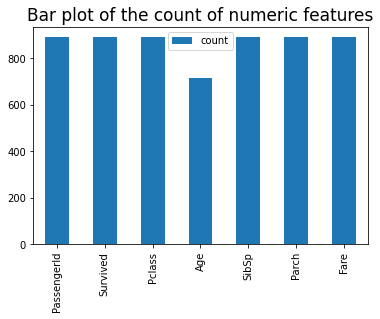

In [4]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features", fontsize=17)

***Hayatta kalan ve kalmayanların göreceli büyüklüğünü kontrol edin***

<AxesSubplot:xlabel='Survived', ylabel='count'>

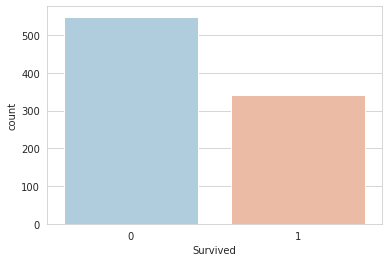

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train, palette='RdBu_r')

***Cinsiyete bağlı olarak hayatta kalma için bir model var mı?***

*Görünüşe göre erkeklerden daha çok kadın hayatta kalmış!*

<AxesSubplot:xlabel='Survived', ylabel='count'>

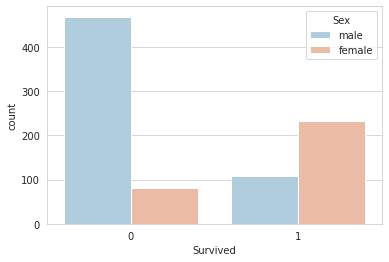

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data = train, palette='RdBu_r')

***Yolcu sınıfıyla ilgili herhangi bir modele ne dersiniz?***

*Görünüşe göre orantısız sayıda 3. sınıf yolcu ölmüş!*

<AxesSubplot:xlabel='Survived', ylabel='count'>

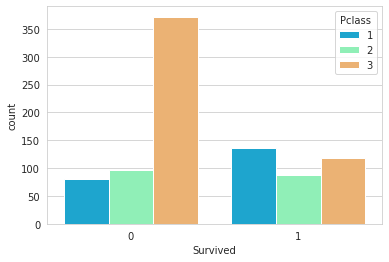

In [7]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', hue = 'Pclass', data = train, palette ='rainbow')

***Aşağıdaki kod, her sınıfa göre hayatta kalan yolcu sayısının oranını çıkarır ve çizer***

Text(0.5, 1.0, 'Fraction of passengers survived by class')

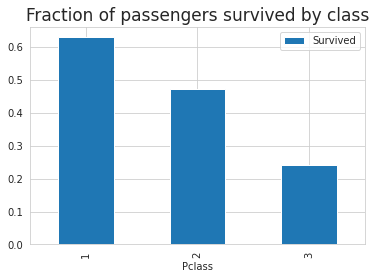

In [8]:
f_class_survived = train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
plt.title("Fraction of passengers survived by class",fontsize=17)

***Peki ya kardeş ve eş sahibi olmakla ilgili herhangi bir model?***

*Daha fazla sayıda kardeş veya eş olması durumunda hayatta kalma şansının arttığına dair zayıf bir eğilim var gibi görünmektedir.*

<AxesSubplot:xlabel='Survived', ylabel='count'>

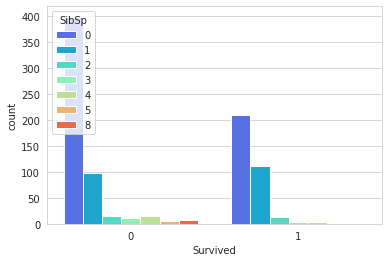

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'SibSp', data = train, palette = 'rainbow')

***Genel yaş dağılımı nasıl görünüyor?***

<AxesSubplot:title={'center':'Age histogram of the passengers'}, xlabel='Age of the passengers', ylabel='Count'>

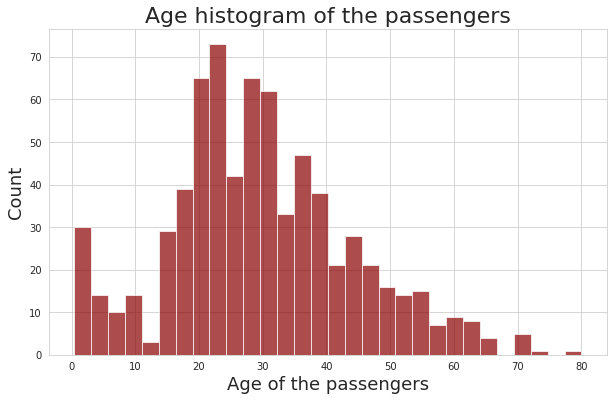

In [10]:
plt.xlabel("Age of the passengers", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Age histogram of the passengers", fontsize=22)
train['Age'].hist(bins=30, color='darkred', alpha=0.7, figsize=(10,6))

***Yolcu sınıfı genelinde yaş dağılımı nasıl görünüyor?***

*Ortalama yaşın üç sınıf için farklı olduğu ve genellikle 1. sınıftan 3. sınıfa doğru azaldığı görülmektedir.*

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

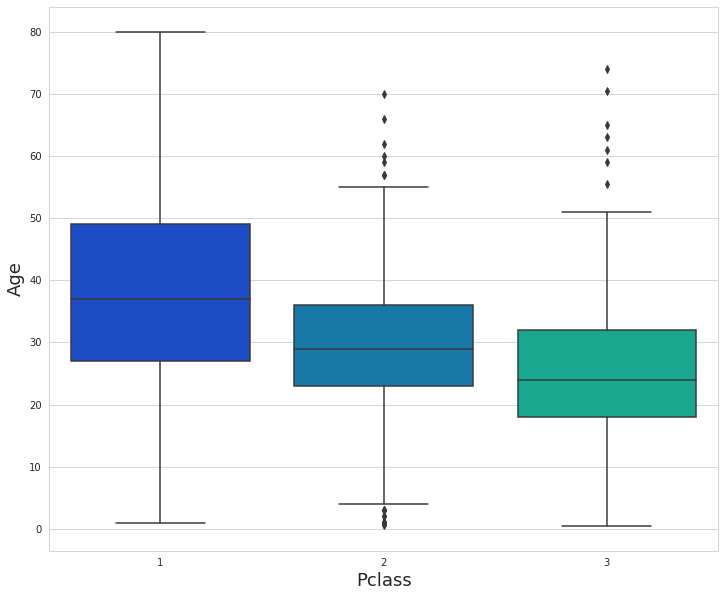

In [11]:
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class", fontsize=18)
plt.ylabel("Age", fontsize=18)
sns.boxplot(x="Pclass", y='Age', data = train, palette='winter')

***Veri düzenleme (impute ve drop)***

  ▶ Yaş tahmini (ortalama alarak)

  ▶ Gereksiz özellikleri bırakın

  ▶ Kategorik özellikleri kukla değişkenlere dönüştürme


***Yaş özelliğini impute etmek (eksik değerleri doldurmak) için bir fonksiyon tanımlayın***

In [ ]:
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

*Yukarıda tanımlanan işlevi uygulayın ve sayısal özelliklerin sayısını çizin*

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)
d=train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count  of numeric features", fontsize=17)

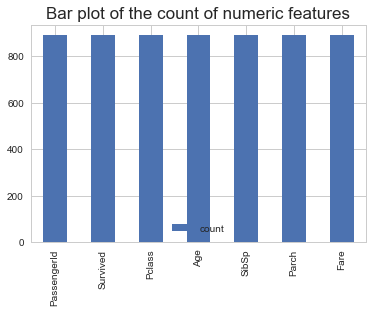

***'Kabin' özelliğini ve diğer tüm null değerleri bırakın***


In [15]:
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


***'PassengerId', 'Name', 'Ticket' gibi diğer gereksiz özellikleri bırakın***

In [16]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


***'Cinsiyet' ve 'Gemiye bindi' gibi kategorik özellikleri kukla değişkenlere dönüştürün***

*pandas 'get_dummies()' işlevini kullanın*

In [17]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

*Şimdi 'Sex' ve 'Embarked' sütunlarını bırakın ve yeni kukla değişkenleri birleştirin*

In [18]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
train = pd.concat([train,sex,embark], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


***Logistic Regression model fit and prediction***

*Verilerimizi bir eğitim seti ve test setine ayırarak başlayalım (tüm bu verileri eğitim için kullanmak istemeniz durumunda üzerinde oynayabileceğiniz başka bir test.csv dosyası vardır).*

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=111)

***Düzenli hale getirme (ceza) parametresinin bir sonucu olarak F1-skoru***

In [21]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=f5f2ff11f8ff120a935b09d4c1420c9b598e0b27acb7b45efffa1e6a37805f9c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
from sklearn.liner_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions=[0]*nsimu
class_report=[0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
  logmodel[i] = (LogisticRegression(C=i/1000, tol=1e-4, max_iter=100, n_jobs=4))
  logmodel[i].fit(X_train, y_train)
  predictions[i] = logmodel[i].predict(X_test)
  class_report[i] = classification_report(y_test, predictions[i])
  l = class_report[i].split()
  f1[i] = l[len(1)-2]
  penalty[i] = 1000/i

plt.scatter(penalty[1:len(penalty)-2], f1[1:len(f1)-2])
plt.title("F1-score vs. regularization", fontsize=20)
plt.xlabel("Penalty parameter", fontsize=17)
plt.ylabel("F1-socre on test data", fontsize=17)
plt.show()


              F1-score vs. regularization parameter


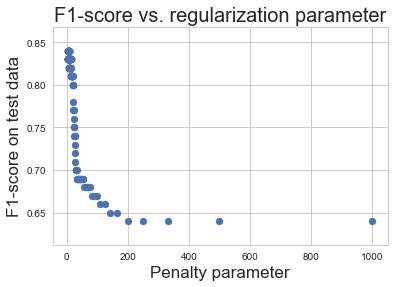

***Test kümesi boyutunun bir fonksiyonu olarak F1-skoru (kesir)***

In [ ]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
test_fraction =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.1+(i-1)*0.007, 
                                                    random_state=111)
        logmodel =(LogisticRegression(C=1,tol=1e-4, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        test_fraction[i]=0.1+(i-1)*0.007

plt.plot(test_fraction[1:len(test_fraction)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. test set size (fraction)",fontsize=20)
plt.xlabel("Test set size (fraction)",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

        F1-score vs. test set size (fraction)

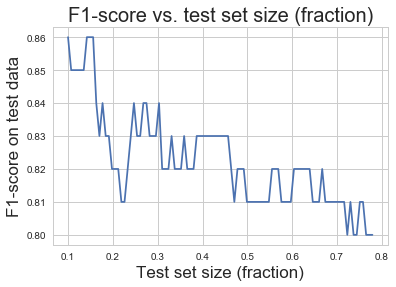

***Test/eğitim bölünmesinin rastgele tohumunun bir fonksiyonu olarak F1-skoru***

In [ ]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
random_init =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.3, 
                                                    random_state=i+100)
        logmodel =(LogisticRegression(C=1,tol=1e-5, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        random_init[i]=i+100

plt.plot(random_init[1:len(random_init)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. random initialization seed",fontsize=20)
plt.xlabel("Random initialization seed",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

            F1-score vs. random initialization seed
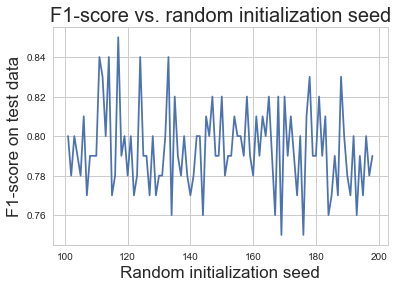